# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad David Ubaidillah
- **Email:** mdavidulearning@gmail.com
- **ID Dicoding:** muhammad_david_ubaid

## Menentukan Pertanyaan Bisnis

- bagaimana tingkat kelembapan udara mempengaruhi penyewa pada saat rentang hari kerja?
- Season berapa rental sepeda yang paling banyak dan paling sedikit tersewa pada rentang hari kerja?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive #google colab mengimpor dari drive
drive.mount('/content/drive', force_remount=True)  #menghubungkan google colab ke drive
%cd /content/drive/My Drive/ColabNotebooks/AnalisisData/Bike-sharing-dataset
!ls #menampilkan daftar file dan direktori

Mounted at /content/drive
/content/drive/My Drive/ColabNotebooks/AnalisisData/Bike-sharing-dataset
app.py	Bike-sharing-dataset.py  dashboard.py  day.csv	hour.csv  Readme.txt


In [2]:
#impor future
from __future__ import print_function, division

#menggunakan matplotlip untuk bisa menampilkan visual kedalam ennvironment jupyter notebook dan python
%matplotlib inline
import numpy as np #mengimpor lib numpy
import pandas as pd #impor lib panda
import seaborn as sns #impor lib seaborn
import matplotlib.pyplot as plt #impor lib matplotlib.pyplot

## Data Wrangling

### Gathering Data

In [3]:
#membaca file menggunakan pandas as pd dan disimpan pada day
day = pd.read_csv('day.csv')
day


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [5]:
#memilih kolom yang ingin ditampilkan dan membuat DataFrame
d = day[['weekday']]
f = day[['hum']]
s = day[['season']]

### Assessing Data

In [6]:
#menampilkan informasi tentang DataFrame
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   weekday  731 non-null    int64
dtypes: int64(1)
memory usage: 5.8 KB


In [7]:
#menampilkan informasi tentang DataFrame
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hum     731 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


In [8]:
#menampilkan informasi tentang DataFrame
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   season  731 non-null    int64
dtypes: int64(1)
memory usage: 5.8 KB


In [9]:
#mendeteksi nilai yang kosong (null atau NaN) dalam DataFrame
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:

#mendeteksi nilai yang kosong (null atau NaN) dalam DataFrame
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#mencetak berapa jumlah duplikasi pada DataFrame
print("Jumlah duplikasi: ", day.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
#memberikan ringkasan statistik deskriptif dari DataFrame
d.describe()

,weekday
count,731.000000
mean,2.997264
std,2.004787
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [13]:
#memberikan ringkasan statistik deskriptif dari DataFrame
f.describe()

,hum
count,731.000000
mean,0.627894
std,0.142429
min,0.000000
25%,0.520000
50%,0.626667
75%,0.730209
max,0.972500


In [14]:
#memberikan ringkasan statistik deskriptif dari DataFrame
s.describe()

,season
count,731.000000
mean,2.496580
std,1.110807
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,4.000000


### Cleaning Data

In [15]:
#menghapus data yang duplikat pada DataFrame
day.drop_duplicates(inplace=True)

In [16]:
#menampilkan jumlah duplikasi data pada DataFrame
print("Jumlah duplikasi: ", day.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

### Explore ...

array([[<Axes: title={'center': 'weekday'}>]], dtype=object)

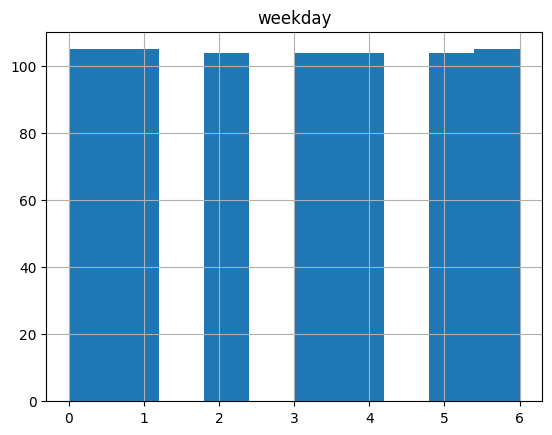

In [17]:
#menampilkan histogram data pada DataFrame
d.hist()

array([[<Axes: title={'center': 'hum'}>]], dtype=object)

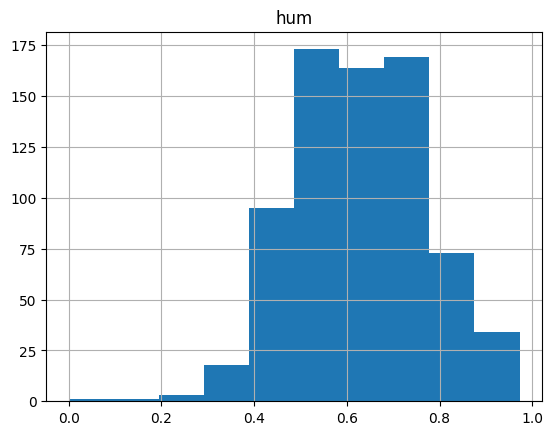

In [18]:
#menampilkan histogram data pada DataFrame
f.hist()

array([[<Axes: title={'center': 'season'}>]], dtype=object)

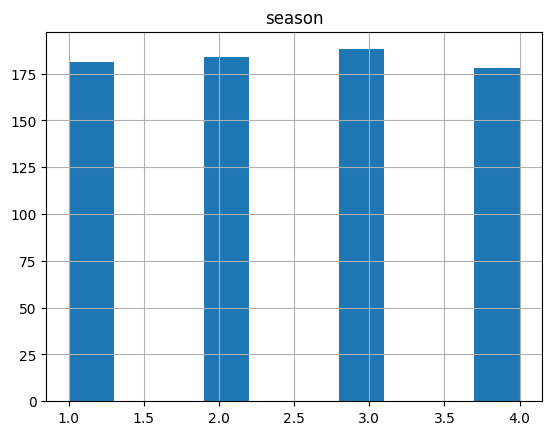

In [19]:
#menampilkan histogram data pada DataFrame
s.hist()

In [20]:
#menghitung korelasi antar kolom-kolom numerik dalam DataFrame
d.corr()

,weekday
weekday,1.0


In [21]:
#menghitung korelasi antar kolom-kolom numerik dalam DataFrame
f.corr()

,hum
hum,1.0


In [22]:
#menghitung korelasi antar kolom-kolom numerik dalam DataFrame
s.corr()

,season
season,1.0


## Visualization & Explanatory Analysis

### Pertanyaan 1:

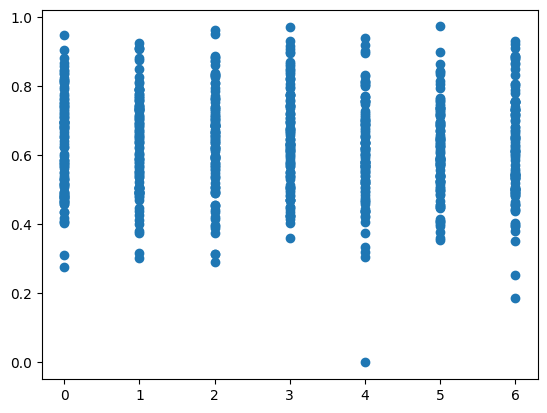

In [23]:
#menunjukkan titik-titik yang merepresentasikan data dalam DataFrame
hum_plot = plt.scatter(x=d, y=f)
hum_plot

In [24]:
#menghasilkan DataFrame baru yang berisi total 'hum' untuk setiap nilai unik dalam kolom 'weekday', yang diurutkan dari yang tertinggi ke terendah,
sum_hum_items_df = day.groupby("weekday").hum.sum().sort_values(ascending=False).reset_index()
sum_hum_items_df.head(10)

,weekday,hum
0,3,67.118276
1,1,66.945536
2,2,66.750254
3,0,65.904171
4,6,65.053826
5,5,63.830598
6,4,63.387899


### Pertanyaan 2:

In [25]:
#menghasilkan DataFrame baru yang berisi total 'weekday' untuk setiap nilai unik dalam kolom 'season', yang diurutkan dari yang tertinggi ke terendah
sum_order_items_df = day.groupby("season").weekday.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,season,weekday
0,3,570
1,2,550
2,1,543
3,4,528


from matplotlib import pyplot as plt
_df_0['season'].plot(kind='hist', bins=20, title='season')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['weekday'].plot(kind='hist', bins=20, title='weekday')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='season', y='weekday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['season'].plot(kind='line', figsize=(8, 4), title='season')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['weekday'].plot(kind='line', figsize=(8, 4), title='weekday')
plt.gca().spines[['top', 'right']].set_visible(False)

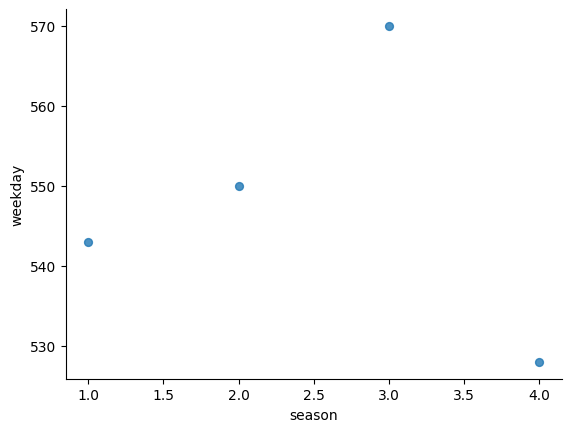

In [27]:
from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='season', y='weekday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Conclusion

- Kelembapan udara sangat mempengaruhi orang untuk melakukan aktivitas bersepeda dengan menyewa sepeda. Keadaan kelembapan udara berkisar antara 0.4 - 0.8 di rentang hari kerja orang seringkali menyewa sepeda untuk melakukan aktivitas bersepeda.
- Keadaan musim mempengaruhi orang untuk melakukan aktivitas bersepeda. Musim ke-3 adalah musim yang paling ramai orang menyewa sepeda untuk melakukan aktivitas bersepeda,sedangkan musim ke-4 adalah musim yang paling sepi orang menyewa sepeda.